In [2]:
# Import the required modules
from skimage.transform import pyramid_gaussian
from skimage.io import imread
from skimage.feature import hog
from sklearn.externals import joblib
import cv2
# import argparse as ap
# from nms import nms
# from config import *
# To display the plot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def sliding_window(image, window_size, step_size):
    '''
    This function returns a patch of the input image `image` of size equal
    to `window_size`. The first image returned top-left co-ordinates (0, 0) 
    and are increment in both x and y directions by the `step_size` supplied.
    So, the input parameters are -
    * `image` - Input Image
    * `window_size` - Size of Sliding Window
    * `step_size` - Incremented Size of Window

    The function returns a tuple -
    (x, y, im_window)
    where
    * x is the top-left x co-ordinate
    * y is the top-left y co-ordinate
    * im_window is the sliding window image
    '''
    for y in range(0, image.shape[0], step_size[1]):
        for x in range(0, image.shape[1], step_size[0]):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

In [4]:
pos_dest_path = '../TrainingData/positive'
neg_dest_path = '../TrainingData/negative'
pos_feat_ph = '../TrainingData/HOG/positive'
neg_feat_ph = '../TrainingData/HOG/negative'
model_path = '../Model/CV'
min_wdw_sz=[64, 64]
step_size=[100, 100]
orientations=9
pixels_per_cell= [8, 8]
cells_per_block= [3, 3]
visualize= False
normalize= True
des_type='HOG'
clf_type = 'LIN_SVM'

min_wdw_sz = (64, 64)
step_size = (50, 50)
downscale = 1.25 # downsize ration args['downscale']
visualize_det = True # args['visualize']

In [ ]:
%%time
if __name__ == "__main__":
    # Parse the command line arguments
#     parser = ap.ArgumentParser()
#     parser.add_argument('-i', "--image", help="Path to the test image", required=True)
#     parser.add_argument('-d','--downscale', help="Downscale ratio", default=1.25,
#             type=int)
#     parser.add_argument('-v', '--visualize', help="Visualize the sliding window",
#             action="store_true")
#     args = vars(parser.parse_args())

    # Read the image
    im_path = '../session3/DJI_0040 38.jpg'
    im = imread(im_path, as_grey=True)
#     plt.imshow(im)


    # Load the classifier
    clf = joblib.load(model_path+ clf_type+'.m')

    # List to store the detections
    detections = []
    # The current scale of the image
    scale = 0
    # Downscale the image and iterate
    for im_scaled in pyramid_gaussian(im, downscale=downscale):
        # This list contains detections at the current scale
        cd = []
        # If the width or height of the scaled image is less than
        # the width or height of the window, then end the iterations.
        if im_scaled.shape[0] < min_wdw_sz[1] or im_scaled.shape[1] < min_wdw_sz[0]:
            break
        for (x, y, im_window) in sliding_window(im_scaled, min_wdw_sz, step_size):
            if im_window.shape[0] != min_wdw_sz[1] or im_window.shape[1] != min_wdw_sz[0]:
                continue
            # Calculate the HOG features
            fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize, normalize)
            fd = fd.reshape(1,-1)
            pred = clf.predict(fd)
            if pred == 1 and clf.decision_function(fd)> 0.7:
                print("Detection:: Location -> ({}, {})".format(x, y))
                print("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
                detections.append((x, y, clf.decision_function(fd),
                    int(min_wdw_sz[0]*(downscale**scale)),
                    int(min_wdw_sz[1]*(downscale**scale))))
                cd.append(detections[-1])
            # If visualize is set to true, display the working
            # of the sliding window
            if visualize_det:
                clone = im_scaled.copy()
                for x1, y1, _, _, _  in cd:
                    # Draw the detections at this scale
                    cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                        im_window.shape[0]), (0, 0, 0), thickness=2)
                cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                    im_window.shape[0]), (255, 255, 255), thickness=2)
                cv2.imshow("Sliding Window in Progress", clone)
                cv2.waitKey(30)
        # Move the the next scale
        scale+=1

In [ ]:
    # Display the results before performing NMS
    clone = im.copy()
    for (x_tl, y_tl, _, w, h) in detections:
        # Draw the detections
        cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=2)
#     cv2.imshow("Raw Detections before NMS", im)
#     cv2.waitKey()

    # Perform Non Maxima Suppression
#     detections = nms(detections, threshold)

    # Display the results after performing NMS
    for (x_tl, y_tl, _, w, h) in detections:
        # Draw the detections
        cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (0, 0, 0), thickness=2)
#     cv2.imshow("Final Detections after applying NMS", clone)
#     cv2.waitKey()

Detection:: Location -> (1800, 400)
Scale ->  0 | Confidence Score [ 1.04530926] 



In [ ]:
im_path = '../session3/DJI_0038 13.jpg'
im = imread(im_path, as_grey=True)
im.shape

In [ ]:
pred = clf.predict(fd)

In [ ]:
%%time
print('hello')

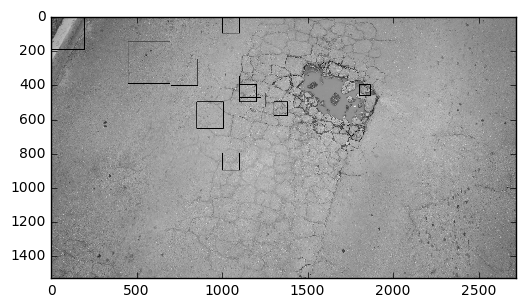

In [11]:
plt.imshow(im, cmap='gray' )

In [1]:
detections

NameError: name 'detections' is not defined